<a href="https://colab.research.google.com/github/ShreyAgarwal11/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/blob/main/diffrence_pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependancies

In [1]:
pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [1]:
!git clone https://github.com/ShreyAgarwal11/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding.git
%cd /content/
!git clone https://github.com/facebookresearch/av_hubert.git

%cd av_hubert
!git submodule init
!git submodule update
!pip install scipy
!pip install sentencepiece
!pip install python_speech_features
!pip install scikit-video

%cd fairseq
!pip install ./

Cloning into 'Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding'...
remote: Enumerating objects: 104890, done.
remote: Counting objects: 100% (1185/1185), done.
remote: Compressing objects: 100% (1103/1103), done.
remote: Total 104890 (delta 105), reused 1136 (delta 82), pack-reused 103705
Receiving objects: 100% (104890/104890), 3.13 GiB | 27.17 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Updating files: 100% (104377/104377), done.
/content
Cloning into 'av_hubert'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 149 (delta 18), reused 22 (delta 14), pack-reused 111
Receiving objects: 100% (149/149), 4.65 MiB | 21.53 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/av_hubert
Submodule 'fairseq' (https://github.com/pytorch/fairseq) registered for path 'fairseq'
Cloning into '/content/av_hubert/fairseq'...
Submodule path 'fairseq': checked out 

In [2]:
!mkdir -p /content/data/misc/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!wget --content-disposition https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy -O /content/data/misc/20words_mean_face.npy

--2024-05-06 21:28:58--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’

/content/data/misc/ 100%[===================>]  61.07M  31.7MB/s    in 1.9s    

2024-05-06 21:29:00 (31.7 MB/s) - ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

--2024-05-06 21:29:15--  https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/master/preprocessing/20words_me

**Import a pre-trained model**

Fine tuned model -> Noise-Augmented AV-HuBERT Base

In [3]:
!pwd
%mkdir -p /content/data/
!wget https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt -O /content/data/finetune-model.pt

/content/av_hubert/fairseq
--2024-05-06 21:29:15--  https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.74, 18.173.166.48, 18.173.166.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1928060481 (1.8G) [binary/octet-stream]
Saving to: ‘/content/data/finetune-model.pt’

/content/data/finet 100%[===================>]   1.79G  91.0MB/s    in 19s     

2024-05-06 21:29:34 (96.8 MB/s) - ‘/content/data/finetune-model.pt’ saved [1928060481/1928060481]



#Shrey's Video frame creation

In [ ]:
import cv2
import os
import numpy as np

frame_folder = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mwbt0/video/sa1'

output_video_path = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/output_video.mp4'

frame_rate = 25

frame_files = [f for f in os.listdir(frame_folder) if os.path.isfile(os.path.join(frame_folder, f))]

frame_files.sort()

video_resolution = (512, 384)

if video_resolution is None:
    first_frame_path = os.path.join(frame_folder, frame_files[0])
    first_frame = cv2.imread(first_frame_path)
    video_resolution = (first_frame.shape[1], first_frame.shape[0])


fourcc = cv2.VideoWriter_fourcc(*'MP4V')

out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

for frame_file in frame_files:
    frame_path = os.path.join(frame_folder, frame_file)
    frame = cv2.imread(frame_path)
    if (frame.shape[1], frame.shape[0]) != video_resolution:
        frame = cv2.resize(frame, video_resolution)
    out.write(frame)

out.release()


#Frame creation and Deepfake video segregation

Video from VidTIMIT that coincide with deepfake in folder comman_data

In [ ]:
import cv2
import os
import shutil
import numpy as np

%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/
%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/

In [ ]:
def create_output_video(frame_folder, frame_rate=25, video_resolution=(512, 384)):
    frame_files = [f for f in os.listdir(frame_folder) if os.path.isfile(os.path.join(frame_folder, f))]
    frame_files.sort()

    if video_resolution is None:
        first_frame_path = os.path.join(frame_folder, frame_files[0])
        first_frame = cv2.imread(first_frame_path)
        video_resolution = (first_frame.shape[1], first_frame.shape[0])

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')

    # Split the input path and extract the necessary components
    parts = frame_folder.split('/')
    speaker = parts[-3]  # Get the speaker ID (e.g., fadg0)
    video_name = parts[-1]  # Get the video name (e.g., sa1)

    # Define the output path
    output_video_path = os.path.join('/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/', f"{video_name}-video-{speaker}.mp4")

    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

    for frame_file in frame_files:
        frame_path = os.path.join(frame_folder, frame_file)
        frame = cv2.imread(frame_path)
        if (frame.shape[1], frame.shape[0]) != video_resolution:
            frame = cv2.resize(frame, video_resolution)
        out.write(frame)

    out.release()

In [ ]:
folder1 = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/'
folder2 = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/'
output_vdtimit = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/'


# Get list of files in each folder
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Extract filenames without extensions
file_names1 = [os.path.splitext(file)[0] for file in files1]
file_names2 = [os.path.splitext(file)[0] for file in files2]

# Find common filenames
common_file_names = set(file_names1).intersection(file_names2)

# Process files with common names
for common_name in common_file_names:

    check_folder = os.path.join(folder2, common_name)

    file_path2_audio = os.path.join(check_folder + '/audio')
    try:
        files2_in_audio = os.listdir(file_path2_audio)
        # print(files2_in_audio)
    except FileNotFoundError:
        # If directory does not exist, delete it and continue to the next directory
        shutil.rmtree(check_folder)
        print("Removed dir :",  check_folder)
        continue

    file_path1 = os.path.join(folder1, common_name)
    file_path2 = os.path.join(folder2, common_name + '/video')
    files1_in = os.listdir(file_path1)
    files2_in = os.listdir(file_path2)

    # Extract filenames without extensions
    file_names1_in = [file.split('-')[0] for file in files1_in if 'video' in file]
    # print(file_names1_in)
    file_names2_in = [file.split('-')[0] for file in files2_in]
    # print(file_names2_in)
    files2_audio_in = [file.split('.')[0] for file in files2_in_audio]
    # print(files2_audio_in)

    # # Find common filenames
    common_file_names_in = set(file_names1_in).intersection(file_names2_in)
    # print(common_file_names_in)
    common_audio_file = set(common_file_names_in).intersection(files2_audio_in)
    # print("Printed Audio -",common_audio_file)

    for filename in common_audio_file:
        # Rearrange the parts to get the desired filename
        new_filename_audio = filename + '-audio-' + common_name + '.wav'
        # print(new_filename_audio)
        file_path = os.path.join(output_vdtimit, new_filename_audio)
        # print("New file path -",file_path)
        shift_path = os.path.join(check_folder + '/audio/' + filename + '.wav')
        if os.path.exists(shift_path):
                # print("Shift_path -",shift_path)
                shutil.copy(shift_path, file_path)
                # print(f"File copied successfully! '{file_path}'")
        else:
          print("Does not exits")

    for common_name_in in common_file_names_in:

      file_path1_in1 = os.path.join(file_path1, common_name_in)
      file_path2_in2 = os.path.join(file_path2, common_name_in)

      # Check if both files exist before proceeding

      if os.path.exists(file_path2_in2):
          create_output_video(file_path2_in2)
          # Do something with the files, such as processing or using them in your code
          # print(f"Files with name '{common_name_in}' exist in both folders:")
          # print(f"File path in folder1: {file_path1_in1}")
          # print(f"File path in folder2: {file_path2_in2}")
          # Your code to process or use the files goes here
      else:
          print(f"Files with name '{common_name_in}' do not exist in both folders.")
          print(f"File path in folder1: {file_path1_in1}")
          print(f"File path in folder2: {file_path2_in2}")

Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/fcmh0
Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mdld0
Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mrgg0


Video from DeepfakeTIMIT that coincide with VidTIMIT in folder comman_data_deep

In [ ]:
frame_folder = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/'
output_video_path = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/'

# Get list of directories in the frame_folder
directories = [os.path.join(frame_folder, name) for name in os.listdir(frame_folder) if os.path.isdir(os.path.join(frame_folder, name))]

# Process files in each directory
for directory in directories:
    # Get list of files in each directory
    files_in_directory = os.listdir(directory)
    # print("directory -", directory)
    intial = directory.split('/')
    speaker = intial[-1]
    # print(intial[-1])

    # Process each file
    for filename in files_in_directory:

      if filename.startswith('.'):
          continue

      if 'video' not in filename:
        # print(filename)
        file_path_audio = os.path.join(directory, filename)
        # print(file_path)
        name, ext = os.path.splitext(filename)
        # print(name)

        # Rearrange the parts to get the desired filename
        new_filename_audio = name + '-audio-' + speaker + ext
        # print(new_filename_audio)

        # Construct the new path
        new_path_audio = os.path.join(output_video_path, new_filename_audio)
        # print(new_path_audio)

        # Copy the file to the new path
        shutil.copy(file_path_audio, new_path_audio)

        # print(f"File copied successfully! '{new_path_audio}'")

      if 'video' in filename:
        # print(filename)
        file_path = os.path.join(directory, filename)
        # print(file_path)
        name, ext = os.path.splitext(filename)
        # print(name)

        # Split the name into parts separated by '-'
        parts = name.split('-')
        # print("Parts -",parts)

        # Rearrange the parts to get the desired filename
        new_filename = parts[0] + '-video-' + speaker + ext
        # print(new_filename)

        # Construct the new path
        new_path = os.path.join(output_video_path, new_filename)
        print(new_path)

        # Copy the file to the new path
        shutil.copy(file_path, new_path)

        # print(f"File copied successfully! '{new_path}'")

/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si913-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx193-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1543-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx103-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa1-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa2-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si2173-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx373-video-mdld0.avi
/content/Privacy-Preserving-Representation

#AVHubert functions

In [4]:
%cd /content/av_hubert/avhubert
import cv2
import tempfile
import torch
import utils as avhubert_utils
from argparse import Namespace
import fairseq
from fairseq import checkpoint_utils, options, tasks, utils
from IPython.display import HTML
from python_speech_features import logfbank
from scipy.io import wavfile

/content/av_hubert/avhubert


**Feature Extraction using AV-HUBERT**

In [5]:
def stacker(feats, stack_order):
            """
            Concatenating consecutive audio frames
            Args:
            feats - numpy.ndarray of shape [T, F]
            stack_order - int (number of neighboring frames to concatenate
            Returns:
            feats - numpy.ndarray of shape [T', F']
            """
            feat_dim = feats.shape[1]
            if len(feats) % stack_order != 0:
                res = stack_order - len(feats) % stack_order
                res = np.zeros([res, feat_dim]).astype(feats.dtype)
                feats = np.concatenate([feats, res], axis=0)
            feats = feats.reshape((-1, stack_order, feat_dim)).reshape(-1, stack_order*feat_dim)
            return feats

In [6]:
def extract_visual_feature(video_path, audio_path, ckpt_path, user_dir, is_finetune_ckpt=False):
  utils.import_user_module(Namespace(user_dir=user_dir))
  models, saved_cfg, task = checkpoint_utils.load_model_ensemble_and_task([ckpt_path])
  transform = avhubert_utils.Compose([
      avhubert_utils.Normalize(0.0, 255.0),
      avhubert_utils.CenterCrop((task.cfg.image_crop_size, task.cfg.image_crop_size)),
      avhubert_utils.Normalize(task.cfg.image_mean, task.cfg.image_std)])
  frames = avhubert_utils.load_video(video_path)
  print(f"Load video {video_path}: shape {frames.shape}")
  sample_rate, wav_data = wavfile.read(audio_path)
  audio_features = logfbank(wav_data, sample_rate).astype(np.float32)
  audio_features = stacker(audio_features, 4)
  print(f"Load audio {audio_path}: shape {audio_features.shape}")
  audio_features = torch.FloatTensor(audio_features).unsqueeze(dim=0).permute(0, 2, 1).cuda()
  frames = torch.FloatTensor(frames).unsqueeze(dim=0).unsqueeze(dim=0).cuda()
  if audio_features.shape[2] < frames.shape[2]:
    # Pad features_audio
    padding_size = frames.shape[2] - audio_features.shape[2]
    padding = torch.zeros((audio_features.shape[0], audio_features.shape[1], padding_size)).cuda()
    audio_features = torch.cat([audio_features, padding], dim=2)
  print(f"Load video {video_path}: shape {frames.shape}")
  print(f"Load audio {audio_path}: shape {audio_features.shape}")
  model = models[0]
  if hasattr(models[0], 'decoder'):
    print(f"Checkpoint: fine-tuned")
    model = models[0].encoder.w2v_model
  else:
    print(f"Checkpoint: pre-trained w/o fine-tuning")
  model.cuda()
  model.eval()
  with torch.no_grad():
    # Specify output_layer if you want to extract feature of an intermediate layer
    layer_features = []
    for i in range(12):
      feature, _ = model.extract_finetune(source={'video': frames, 'audio': audio_features}, padding_mask=None, output_layer=(i+1))
      layer_features.append(feature)
    feature, _ = model.extract_finetune(source={'video': frames, 'audio': audio_features}, padding_mask=None, output_layer=None)
    feature = feature.squeeze(dim=0)
  print(f"AvHuBert Feature shape: {feature.shape}")
  return layer_features, feature


In [ ]:
folder_path_real = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/'
folder_path_deep = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/'

# Initialize an empty list to store pairs of file paths
real_file_pairs = []
deep_file_pairs = []

# Get the list of files in the real folder
files_real = os.listdir(folder_path_real)

# Get the list of files in the deep folder
files_deep = os.listdir(folder_path_deep)

# Iterate over each file in the real folder
for file_real in files_real:
    # Split the filename and extension
    name, ext_real = os.path.splitext(file_real)
    # print(file_real)

    # Check if the file is an audio file
    if ext_real == '.wav':
        # Construct the expected video filename
        audio_filename_real = name
        video_filename_real = name.replace('-audio-', '-video-')
        # print(video_filename)

        # Check if the video file exists in the deep folder
        for file_deep in files_deep:
            name_deep, ext_deep = os.path.splitext(file_deep)
            # print(name_deep)
                # Check if the file is an audio file
            if ext_deep == '.wav':
                # Construct the expected video filename
                audio_filename_deep = name_deep
                video_filename_deep = name_deep.replace('-audio-', '-video-')
                if video_filename_deep == video_filename_real:
                    # Construct the paths for the audio and video files in both folders
                    audio_path_real = os.path.join(folder_path_real, audio_filename_real + ext_deep)
                    # print(audio_path_real)
                    video_path_real = os.path.join(folder_path_real, video_filename_real + '.mp4')
                    audio_path_deep = os.path.join(folder_path_deep, audio_filename_deep + ext_deep)
                    # print(audio_path_deep)
                    video_path_deep = os.path.join(folder_path_deep, video_filename_real + '.avi')

                    # Check if both audio and video files exist in both folders
                    if os.path.exists(audio_path_real) and os.path.exists(video_path_real) and \
                      os.path.exists(audio_path_deep) and os.path.exists(video_path_deep):
                        # Add the pair of paths to the list
                        real_file_pairs.append((audio_path_real, video_path_real))
                        deep_file_pairs.append((audio_path_deep, video_path_deep))

# Print the number of file pairs found
print(len(os.listdir(folder_path_real)))
print(len(os.listdir(folder_path_deep)))
print(len(real_file_pairs))
print(len(deep_file_pairs))


580
640
290
290


In [ ]:
ckpt_path = "/content/data/finetune-model.pt"
user_dir = "/content/av_hubert/avhubert"

feature_real = {}
feature_deep = {}

# Counter variables to keep track of iterations
count_real = 0
count_deep = 0

# Loop over real_file_pairs
for pair in real_file_pairs:
    # Increment the counter
    count_real += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_r, ext_r = os.path.splitext(pair[0])
    index_data_r = name_r.split('/')[-1].replace('-audio-', '')

    # Check if the index is not already in feature_real
    if index_data_r not in feature_real:
        layer_features, feature_real[index_data_r] = extract_visual_feature(mouth_roi_path, audio_path, ckpt_path, user_dir)

    # # Break after every 5 iterations
    if count_real == 50:
        break

# Loop over deep_file_pairs
for pair in deep_file_pairs:
    # Increment the counter
    count_deep += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_d, ext_d = os.path.splitext(pair[0])
    index_data_d = name_d.split('/')[-1].replace('-audio-', '')

    # Check if the index is not already in feature_deep
    if index_data_d not in feature_deep:
        layer_features, feature_deep[index_data_d] = extract_visual_feature(mouth_roi_path, audio_path, ckpt_path, user_dir)

    # Break after every 5 iterations
    if count_deep == 50:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape (138, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape torch.Size([1, 1, 138, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape (137, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape (137, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape torch.Size([1, 1, 137, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape (114, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape (114, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape torch.Size([1, 1, 114, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape (102, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape (102, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape torch.Size([1, 1, 102, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape (82, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape (82, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape torch.Size([1, 1, 82, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape (104, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape (104, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape torch.Size([1, 1, 104, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape (123, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape (123, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape torch.Size([1, 1, 123, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape (98, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape (98, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape torch.Size([1, 1, 98, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape (72, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape (72, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape torch.Size([1, 1, 72, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape (99, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape (99, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape torch.Size([1, 1, 99, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape (90, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape (90, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape torch.Size([1, 1, 90, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape torch.Size([1, 104, 90])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([90, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape (101, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape (101, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape torch.Size([1, 1, 101, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape (86, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape (86, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape torch.Size([1, 1, 86, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape (121, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape (121, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape torch.Size([1, 1, 121, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape (88, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape (88, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape torch.Size([1, 1, 88, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape (125, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape (125, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape torch.Size([1, 1, 125, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape torch.Size([1, 104, 125])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([125, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape (117, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape (117, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape torch.Size([1, 1, 117, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape (116, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape (116, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape torch.Size([1, 1, 116, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape (97, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape (97, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape torch.Size([1, 1, 97, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape (155, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape (155, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape torch.Size([1, 1, 155, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape (128, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape (128, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape torch.Size([1, 1, 128, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape (95, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape (95, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape torch.Size([1, 1, 95, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape (81, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape (81, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape torch.Size([1, 1, 81, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape (182, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape (182, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape torch.Size([1, 1, 182, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape (112, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape (112, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape torch.Size([1, 1, 112, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape (149, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape (149, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape torch.Size([1, 1, 149, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape torch.Size([1, 104, 149])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([149, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape (93, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape (93, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape torch.Size([1, 1, 93, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape (69, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape (69, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape torch.Size([1, 1, 69, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-video-mrjo0.avi: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-audio-mrjo0.wav: shape (138, 104)
Load video

In [ ]:
feature_real

{'si1364mrjo0': tensor([[ 0.0337, -0.1497, -0.0243,  ...,  0.2315,  0.0290,  0.1629],
         [ 0.1824, -0.0650, -0.0055,  ..., -0.1429,  0.1406,  0.1006],
         [ 0.1506, -0.0165,  0.0294,  ..., -0.2116,  0.1907, -0.0434],
         ...,
         [-0.0669,  0.0628,  0.3312,  ..., -0.1542, -0.0586, -0.0743],
         [-0.1628,  0.0195,  0.3841,  ..., -0.0440,  0.0142, -0.0896],
         [-0.1855,  0.0034,  0.3307,  ...,  0.1063,  0.0212, -0.1072]],
        device='cuda:0'),
 'si844fdac1': tensor([[ 0.0372, -0.1600, -0.0227,  ...,  0.2216,  0.0322,  0.1591],
         [ 0.1889, -0.0792, -0.0043,  ..., -0.1479,  0.1435,  0.0944],
         [ 0.1673, -0.0344,  0.0250,  ..., -0.2216,  0.1901, -0.0467],
         ...,
         [-0.0475,  0.0446,  0.3250,  ..., -0.1681, -0.0527, -0.0792],
         [-0.1483,  0.0048,  0.3779,  ..., -0.0552,  0.0187, -0.0937],
         [-0.1741, -0.0109,  0.3278,  ...,  0.0910,  0.0260, -0.1122]],
        device='cuda:0'),
 'si1360fram1': tensor([[ 0.0072, -0.

In [ ]:
feature_deep

{'si1364mrjo0': tensor([[ 0.0321, -0.1495, -0.0234,  ...,  0.2316,  0.0286,  0.1641],
         [ 0.1767, -0.0651, -0.0033,  ..., -0.1411,  0.1404,  0.0989],
         [ 0.1460, -0.0175,  0.0306,  ..., -0.2103,  0.1939, -0.0450],
         ...,
         [-0.0735,  0.0599,  0.3316,  ..., -0.1554, -0.0606, -0.0764],
         [-0.1686,  0.0165,  0.3847,  ..., -0.0434,  0.0144, -0.0920],
         [-0.1892,  0.0049,  0.3314,  ...,  0.1092,  0.0190, -0.1077]],
        device='cuda:0'),
 'si844fdac1': tensor([[ 0.0344, -0.1576, -0.0225,  ...,  0.2241,  0.0302,  0.1604],
         [ 0.1824, -0.0761, -0.0015,  ..., -0.1453,  0.1417,  0.0947],
         [ 0.1597, -0.0310,  0.0280,  ..., -0.2187,  0.1911, -0.0478],
         ...,
         [-0.0572,  0.0468,  0.3266,  ..., -0.1675, -0.0557, -0.0794],
         [-0.1559,  0.0062,  0.3804,  ..., -0.0533,  0.0173, -0.0945],
         [-0.1803, -0.0074,  0.3302,  ...,  0.0945,  0.0230, -0.1122]],
        device='cuda:0'),
 'si1360fram1': tensor([[-0.0308, -0.

#Diffrential Privacy filter

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split
from itertools import chain
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Define training parameters
input_size = 768  # Size of input features
hidden_size = 384  # Size of hidden layer
output_size = 768  # Size of output features (deepfake-like features)
batch_size = 24
num_layers = 2
noise_multiplier = 0.1
max_grad_norm = 1.0
num_epochs = 1000
learning_rate = 0.0001

In [ ]:
# Define custom dataset
class MyDataset(Dataset):
    def __init__(self, real_features, deepfake_features):
        self.real_features = real_features
        self.deepfake_features = deepfake_features

    def __len__(self):
        return len(self.real_features)

    def __getitem__(self, idx):
        return self.real_features[idx], self.deepfake_features[idx]

In [ ]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def dict_to_tensor(feature_real, feature_deep, desired_size, device):
  """
  Processes dictionaries of real and deepfake feature sequences into tensors.

  Args:
      feature_real: A dictionary of real feature sequences (tensors).
      feature_deep: A dictionary of deepfake feature sequences (tensors).
      desired_size: The desired size for the output tensors.
      device: The device to move the tensors to (e.g., 'cuda:0' for GPU).

  Returns:
      A tuple of tensors representing the processed real and deepfake features.
  """

  # Combine keys from both dictionaries
  all_keys = set(feature_real.keys()) | set(feature_deep.keys())

  # Find minimum sequence length across all features (using chain)
  min_length = min(len(seq) for seq in chain(feature_real.values(), feature_deep.values()))

  # Process each feature sequence, considering minimum length
  tensor_list_real = {key: None for key in all_keys}  # Initialize empty dict
  tensor_list_deep = {key: None for key in all_keys}  # Initialize empty dict
  for key in all_keys:
    real_seq = feature_real.get(key)
    deep_seq = feature_deep.get(key)
    if real_seq is not None:
      tensor_list_real[key] = F.interpolate(
          real_seq[:min_length].unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)
    if deep_seq is not None:
      tensor_list_deep[key] = F.interpolate(
          deep_seq[:min_length].unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)

  # Stack and move to desired device
  real_features_tensor = torch.stack([tensor_list_real[key] for key in feature_real.keys()]).to(device)
  deepfake_features_tensor = torch.stack([tensor_list_deep[key] for key in feature_deep.keys()]).to(device)
  return real_features_tensor, deepfake_features_tensor

In [ ]:
# Synthetic dataset
# Convert dictionary to tensor and resize features
real_features, deepfake_features = dict_to_tensor(feature_real, feature_deep, input_size, device)

In [ ]:
real_features

tensor([[[ 0.0337, -0.1497, -0.0243,  ...,  0.2315,  0.0290,  0.1629],
         [ 0.1824, -0.0650, -0.0055,  ..., -0.1429,  0.1406,  0.1006],
         [ 0.1506, -0.0165,  0.0294,  ..., -0.2116,  0.1907, -0.0434],
         ...,
         [ 0.2791,  0.0735,  0.0227,  ..., -0.1190, -0.4003,  0.0074],
         [ 0.2787,  0.0734,  0.0228,  ..., -0.1215, -0.4004,  0.0088],
         [ 0.2786,  0.0735,  0.0229,  ..., -0.1232, -0.4015,  0.0099]],

        [[ 0.0372, -0.1600, -0.0227,  ...,  0.2216,  0.0322,  0.1591],
         [ 0.1889, -0.0792, -0.0043,  ..., -0.1479,  0.1435,  0.0944],
         [ 0.1673, -0.0344,  0.0250,  ..., -0.2216,  0.1901, -0.0467],
         ...,
         [ 0.2975,  0.0570,  0.0192,  ..., -0.1471, -0.3939, -0.0063],
         [ 0.2970,  0.0565,  0.0197,  ..., -0.1460, -0.3938, -0.0063],
         [ 0.2970,  0.0560,  0.0199,  ..., -0.1455, -0.3936, -0.0058]],

        [[ 0.0072, -0.1443, -0.0176,  ...,  0.2343,  0.0249,  0.1746],
         [ 0.1128, -0.0520,  0.0250,  ..., -0

In [ ]:
deepfake_features

tensor([[[ 3.2117e-02, -1.4953e-01, -2.3393e-02,  ...,  2.3164e-01,
           2.8560e-02,  1.6406e-01],
         [ 1.7674e-01, -6.5082e-02, -3.2546e-03,  ..., -1.4112e-01,
           1.4044e-01,  9.8912e-02],
         [ 1.4602e-01, -1.7526e-02,  3.0644e-02,  ..., -2.1033e-01,
           1.9388e-01, -4.4958e-02],
         ...,
         [ 2.7445e-01,  7.3909e-02,  1.9542e-02,  ..., -1.1725e-01,
          -4.0546e-01,  6.8320e-03],
         [ 2.7438e-01,  7.4162e-02,  1.9759e-02,  ..., -1.1950e-01,
          -4.0531e-01,  7.9358e-03],
         [ 2.7426e-01,  7.4530e-02,  2.0117e-02,  ..., -1.2073e-01,
          -4.0587e-01,  9.0176e-03]],

        [[ 3.4436e-02, -1.5756e-01, -2.2521e-02,  ...,  2.2409e-01,
           3.0163e-02,  1.6043e-01],
         [ 1.8238e-01, -7.6064e-02, -1.5109e-03,  ..., -1.4532e-01,
           1.4173e-01,  9.4654e-02],
         [ 1.5974e-01, -3.0997e-02,  2.7993e-02,  ..., -2.1875e-01,
           1.9105e-01, -4.7759e-02],
         ...,
         [ 2.8726e-01,  6

In [ ]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(real_features))
val_size = len(real_features) - train_size
train_real, val_real = random_split(real_features, [train_size, val_size])
train_deepfake, val_deepfake = random_split(deepfake_features, [train_size, val_size])


In [ ]:
# Create DataLoader for training and validation sets
train_dataset = MyDataset(train_real, train_deepfake)
val_dataset = MyDataset(val_real, val_deepfake)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Define evaluation metrics function
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):
    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""
    lr = initial_lr * (0.1**(epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Define a function to calculate moving averages
def moving_average(data, window_size):
    """Calculate the moving average of data using a window size."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

TEST 1

In [ ]:
# Define the neural network architecture for feature generation
class Generator(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(Generator, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.num_layers = num_layers

    # Define the layers
    self.layers = nn.ModuleList()
    self.layers.append(nn.Linear(input_size, hidden_size))
    for _ in range(num_layers - 2):
      self.layers.append(nn.Linear(hidden_size, hidden_size))
    self.layers.append(nn.Linear(hidden_size, output_size))

  def forward(self, x):
    for layer in self.layers[:-1]:
      x = F.relu(layer(x))
    x = self.layers[-1](x)
    return x

# Define the differential privacy mechanism
class DPGenerator(Generator):
  def __init__(self, input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm):
        super(DPGenerator, self).__init__(input_size, hidden_size, output_size, num_layers)
        self.max_grad_norm = max_grad_norm
        self.noise_multiplier = noise_multiplier

  def forward(self, x):
      return super(DPGenerator, self).forward(x)

  def backward(self, loss):
      loss.backward()
      for param in self.parameters():
          if param.grad is not None:
              param.grad += torch.randn_like(param.grad) * self.noise_multiplier
              param.grad = torch.clamp(param.grad, -self.max_grad_norm, self.max_grad_norm)

In [ ]:
# Initialize the model
model = DPGenerator(input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm).to(device)

# Define the loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model(real_features)
        loss = criterion(output, deepfake_features)
        model.backward(loss)
        optimizer.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 2

In [ ]:
# Define the neural network architecture for feature generation
class Generator2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator2, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator2(Generator2):
    def __init__(self, input_size, hidden_size, output_size, num_layers, max_grad_norm):
          super(DPGenerator2, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.noise_log_std = nn.Parameter(torch.zeros(1))  # Trainable log std for noise
          self.max_grad_norm = max_grad_norm

    def forward(self, x):
      return super(DPGenerator2, self).forward(x)

    def backward(self, loss):
      loss.backward()
      for param in self.parameters():
        if param.grad is not None:
          noise = torch.randn_like(param.grad) * torch.exp(self.noise_log_std)
          param.grad += noise
          param.grad = torch.clamp(param.grad, -self.max_grad_norm, self.max_grad_norm)

In [ ]:
# Initialize the model
model2 = DPGenerator2(input_size, hidden_size, output_size, num_layers, max_grad_norm).to(device)

# Define the loss function
optimizer2 = optim.Adam(model.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


Epoch [1/1000], Batch [1/2], Train Loss: 0.0299
Epoch [1/1000], Batch [2/2], Train Loss: 0.0286
Epoch [1/1000], Validation Loss: 0.0297
Epoch [2/1000], Batch [1/2], Train Loss: 0.0292
Epoch [2/1000], Batch [2/2], Train Loss: 0.0296
Epoch [2/1000], Validation Loss: 0.0297
Epoch [3/1000], Batch [1/2], Train Loss: 0.0296
Epoch [3/1000], Batch [2/2], Train Loss: 0.0291
Epoch [3/1000], Validation Loss: 0.0297
Epoch [4/1000], Batch [1/2], Train Loss: 0.0294
Epoch [4/1000], Batch [2/2], Train Loss: 0.0293
Epoch [4/1000], Validation Loss: 0.0297
Epoch [5/1000], Batch [1/2], Train Loss: 0.0291
Epoch [5/1000], Batch [2/2], Train Loss: 0.0297
Epoch [5/1000], Validation Loss: 0.0297
Epoch [6/1000], Batch [1/2], Train Loss: 0.0295
Epoch [6/1000], Batch [2/2], Train Loss: 0.0291
Epoch [6/1000], Validation Loss: 0.0297
Epoch [7/1000], Batch [1/2], Train Loss: 0.0291
Epoch [7/1000], Batch [2/2], Train Loss: 0.0297
Epoch [7/1000], Validation Loss: 0.0297
Epoch [8/1000], Batch [1/2], Train Loss: 0.0298


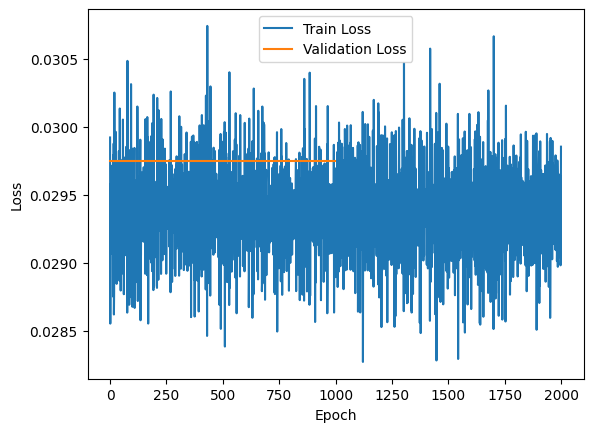

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer2.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model2(real_features)
        loss = criterion2(output, deepfake_features)
        loss.backward()
        optimizer2.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model2.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model2(real_features)
            loss = criterion2(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 3

In [ ]:
# Define the neural network architecture for feature generation
class Generator3(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator3, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator3(Generator3):
    def __init__(self, input_size, hidden_size, output_size, num_layers, max_grad_norm):
          super(DPGenerator3, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.max_grad_norm = max_grad_norm
          self.noise_multiplier = nn.Parameter(torch.tensor(1.0))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
            # Add noise proportional to the noise multiplier
            noise = torch.randn_like(x) * self.noise_multiplier
            x = x + noise  # Use x = x + noise instead of inplace operation x += noise
        x = self.layers[-1](x)
        return x

In [ ]:
# Initialize the model
model3 = DPGenerator3(input_size, hidden_size, output_size, num_layers, max_grad_norm).to(device)
model3.noise_multiplier.data.fill_(noise_multiplier)


# Define the loss function
optimizer3 = optim.Adam(model.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

Epoch [1/1000], Batch [1/2], Train Loss: 0.0312
Epoch [1/1000], Batch [2/2], Train Loss: 0.0303
Epoch [1/1000], Validation Loss: 0.0315
Epoch [2/1000], Batch [1/2], Train Loss: 0.0301
Epoch [2/1000], Batch [2/2], Train Loss: 0.0319
Epoch [2/1000], Validation Loss: 0.0314
Epoch [3/1000], Batch [1/2], Train Loss: 0.0304
Epoch [3/1000], Batch [2/2], Train Loss: 0.0315
Epoch [3/1000], Validation Loss: 0.0315
Epoch [4/1000], Batch [1/2], Train Loss: 0.0308
Epoch [4/1000], Batch [2/2], Train Loss: 0.0308
Epoch [4/1000], Validation Loss: 0.0314
Epoch [5/1000], Batch [1/2], Train Loss: 0.0312
Epoch [5/1000], Batch [2/2], Train Loss: 0.0303
Epoch [5/1000], Validation Loss: 0.0314
Epoch [6/1000], Batch [1/2], Train Loss: 0.0311
Epoch [6/1000], Batch [2/2], Train Loss: 0.0304
Epoch [6/1000], Validation Loss: 0.0315
Epoch [7/1000], Batch [1/2], Train Loss: 0.0305
Epoch [7/1000], Batch [2/2], Train Loss: 0.0313
Epoch [7/1000], Validation Loss: 0.0315
Epoch [8/1000], Batch [1/2], Train Loss: 0.0309


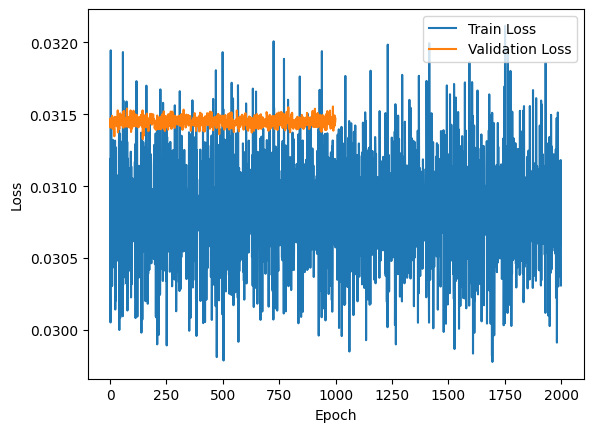

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model3.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer3.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model3(real_features)
        loss = criterion3(output, deepfake_features)
        loss.backward()
        optimizer3.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model3.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model3(real_features)
            loss = criterion3(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 4

In [ ]:
# Define the neural network architecture for feature generation
class Generator4(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator4, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator4(Generator4):
    def __init__(self, input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm):
          super(DPGenerator4, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.noise_multiplier = noise_multiplier
          self.max_grad_norm = max_grad_norm

          # Ensure all parameters have requires_grad=True
          for param in self.parameters():
              param.requires_grad = True

    def forward(self, x):
        # Add noise during forward pass for privacy
        with torch.no_grad():
            x = super().forward(x)
            x += torch.randn_like(x) * self.noise_multiplier
        return x

In [ ]:
# Initialize the model
model4 = DPGenerator4(input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm).to(device)

# Define the loss function
optimizer4 = optim.Adam(model.parameters(), lr=learning_rate)
criterion4 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


Epoch [1/1000], Batch [1/2], Train Loss: 0.0379
Epoch [1/1000], Batch [2/2], Train Loss: 0.0372
Epoch [1/1000], Validation Loss: 0.0382
Epoch [2/1000], Batch [1/2], Train Loss: 0.0376
Epoch [2/1000], Batch [2/2], Train Loss: 0.0377
Epoch [2/1000], Validation Loss: 0.0383
Epoch [3/1000], Batch [1/2], Train Loss: 0.0379
Epoch [3/1000], Batch [2/2], Train Loss: 0.0372
Epoch [3/1000], Validation Loss: 0.0383
Epoch [4/1000], Batch [1/2], Train Loss: 0.0378
Epoch [4/1000], Batch [2/2], Train Loss: 0.0373
Epoch [4/1000], Validation Loss: 0.0382
Epoch [5/1000], Batch [1/2], Train Loss: 0.0378
Epoch [5/1000], Batch [2/2], Train Loss: 0.0374
Epoch [5/1000], Validation Loss: 0.0382
Epoch [6/1000], Batch [1/2], Train Loss: 0.0377
Epoch [6/1000], Batch [2/2], Train Loss: 0.0375
Epoch [6/1000], Validation Loss: 0.0382
Epoch [7/1000], Batch [1/2], Train Loss: 0.0379
Epoch [7/1000], Batch [2/2], Train Loss: 0.0373
Epoch [7/1000], Validation Loss: 0.0382
Epoch [8/1000], Batch [1/2], Train Loss: 0.0377


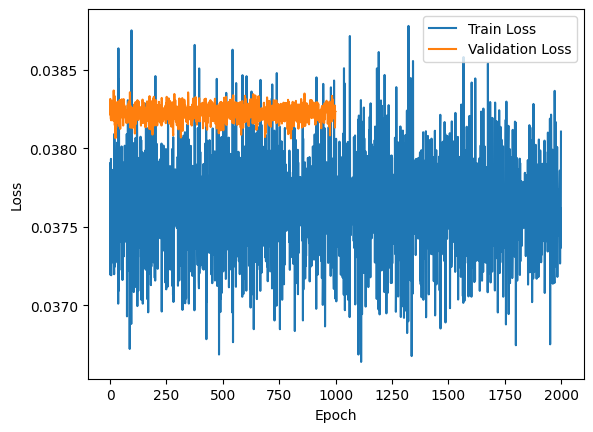

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model4.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer4.zero_grad()
        real_features, deepfake_features = real_features.to(device).float(), deepfake_features.to(device).float()
        real_features.requires_grad = True  # Ensure gradients are tracked for inputs
        deepfake_features.requires_grad = True
        output = model4(real_features)
        loss = criterion4(output, deepfake_features)
        train_loss += loss.item()
        loss.backward()
        optimizer4.step()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model4.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model4(real_features)
            loss = criterion4(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_losses

[0.037904392927885056,
 0.037195563316345215,
 0.03758431226015091,
 0.03771628439426422,
 0.03793232515454292,
 0.03719206154346466,
 0.037802327424287796,
 0.03734620288014412,
 0.03778769075870514,
 0.037410397082567215,
 0.03770967572927475,
 0.03752969577908516,
 0.03786255419254303,
 0.03727363795042038,
 0.03767665475606918,
 0.0376417450606823,
 0.03785935789346695,
 0.03729652985930443,
 0.03719864413142204,
 0.0380912646651268,
 0.03798770159482956,
 0.03724668174982071,
 0.03755659982562065,
 0.03776998817920685,
 0.0375327467918396,
 0.037792056798934937,
 0.03748596832156181,
 0.03795449063181877,
 0.03781898319721222,
 0.0373639352619648,
 0.03734074532985687,
 0.03803573176264763,
 0.037850067019462585,
 0.037272557616233826,
 0.03770868107676506,
 0.0375395193696022,
 0.037011295557022095,
 0.03863564878702164,
 0.03709288686513901,
 0.03843695670366287,
 0.037963394075632095,
 0.03722498193383217,
 0.03755880892276764,
 0.03769954293966293,
 0.03772813081741333,
 0.037

TEST 5

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model1.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model1(real_features)
        loss = criterion(output, deepfake_features)
        loss.backward()
        optimizer.step()
        train_loss += loss.item
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {val_losses[-1]:.4f}")

    # Validation
    model1.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model1(real_features)
            loss = criterion(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Plot losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

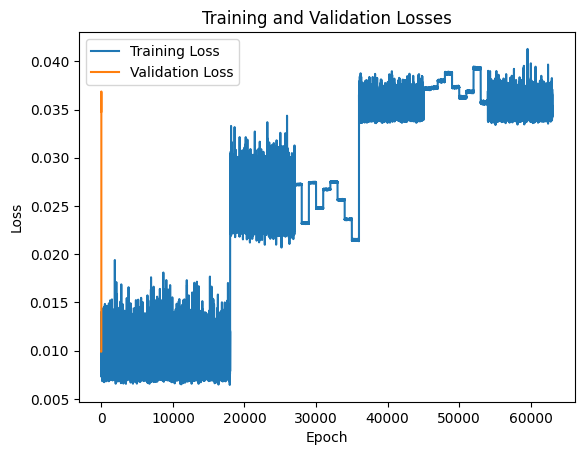

In [ ]:
len(generated_features)

21

In [ ]:
generated_features

[array([[[-0.1050486 ,  0.0592591 , -0.04588313, ...,  0.0681432 ,
           0.05616908, -0.07822345],
         [-0.09180458,  0.10368504, -0.02269186, ...,  0.080788  ,
           0.09603249, -0.21644062],
         [-0.10137026,  0.10495242, -0.0299967 , ...,  0.05484535,
           0.10793833, -0.20948854],
         ...,
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608]],
 
        [[-0.10067847,  0.06771937, -0.04842731, ...,  0.06707394,
           0.06730863, -0.09654537],
         [-0.09655349,  0.09838504, -0.02307442, ...,  0.08135854,
           0.08672763, -0.19937101],
         [-0.10654895,  0.09703689, -0.01857823, ...,  0.06867893,
           0.08792984, -0.19429311],
         ...,
         [-0.01912401,  0.0277293

In [ ]:
def adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch):
    """Adjusts the learning rate of the optimizer."""
    lr = initial_lr * (0.1 ** (epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train_model(model, train_loader, val_loader, num_epochs, initial_lr=0.001, lr_decay_epoch=3, device='cuda'):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    criterion = nn.MSELoss()
    scheduler = StepLR(optimizer, step_size=lr_decay_epoch, gamma=0.1)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)
        for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            optimizer.zero_grad()
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {loss.item():.4f}")

        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
                real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
                output = model(real_features)
                val_loss += criterion(output, deepfake_features).item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses

def evaluate_model(model, loader, device='cuda'):
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0
    with torch.no_grad():
        for real_features, deepfake_features in loader:
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model(real_features)
            total_loss += criterion(output, deepfake_features).item()

    avg_loss = total_loss / len(loader)
    return avg_loss

In [ ]:
train_model(model, train_loader, val_loader, 1000)
evaluate_model(model, val_loader)

#Emotion Recognition

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/session1.zip
!unzip /content/drive/MyDrive/session1_video.zip

Archive:  /content/drive/MyDrive/session1.zip
   creating: session1/
   creating: session1/S01A/
   creating: session1/S01A/P/
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF03.wav  
   creating: session1/S01A/R/
  inflating: session1/S01A/R/MSP-IMPROV-S01A-M01-R-MM01.wav  
   creating: session1/S01A/S/
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM01.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM02.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM03.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM04.wav  
  infla

In [10]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
torch.cuda.empty_cache()

In [11]:
final_features = []

In [12]:
import os

# Define the directory containing video and audio files
directory = "/content/drive/MyDrive/Extra_Data"

# Initialize an empty dictionary to store video-audio pairs
video_audio_mapping = {}

# Iterate through the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".avi"):
            video_path = os.path.join(root, file)
            # Replace .avi with .wav to get corresponding audio path
            audio_path = os.path.join(root, file[:-4] + ".wav")
            # Check if corresponding audio file exists
            if os.path.exists(audio_path):
                video_audio_mapping[video_path] = audio_path

# Print the video-audio mapping
for video_path, audio_path in video_audio_mapping.items():
    print(f"Video: {video_path}, Audio: {audio_path}")

Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM01.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM01.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM03.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM03.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM02.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM02.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM01.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM01.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF01.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF01.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM05.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM05.wav
Video: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM02.avi, Audio: /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-

In [13]:
import cv2

def resize_video(video_path, output_path, width=320, height=240):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return

    # Get original video properties
    original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change this to match your video codec

    # Create a VideoWriter object to write the resized video
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Resize the frame to the specified dimensions
        resized_frame = cv2.resize(frame, (width, height))
        out.write(resized_frame)

    # Release resources
    cap.release()
    out.release()

In [14]:
import numpy as np
ckpt_path = "/content/data/finetune-model.pt"
user_dir = "/content/av_hubert/avhubert"
files = {}
for video_path, audio_path in video_audio_mapping.items():
  files[video_path] = audio_path
  label = video_path.split("/")
  label = label[-1].split('-')[2][-1]
  print(label)
  if label == 'A':
    label = 0
  elif label == 'H':
    label = 1
  elif label == 'S':
    label = 2
  else:
    label = 3
  # Resize the video
  output_path = "resized_video.avi"
  resize_video(video_path, output_path, width=320, height=240)

  # Extract visual features
  layer_features, feature = extract_visual_feature(output_path, audio_path, ckpt_path, user_dir)

  # Create a tensor for the label
  label_tensor = torch.tensor([label] * feature.size(0), dtype=torch.float).unsqueeze(1)  # Repeat the label for each row in feature

  # Concatenate the label tensor with the feature tensor along the second dimension (columns)
  label_tensor = label_tensor.to(feature.device)
  feature_with_label = torch.cat((feature, label_tensor), dim=1)
  final_features.append(feature_with_label)


A


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load video resized_video.avi: shape (36, 240, 320)


Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM01.wav: shape (30, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 36, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM01.wav: shape torch.Size([1, 104, 36])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([36, 768])
A
Load video resized_video.avi: shape (64, 240, 320)


Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM03.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM03.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])
A


Load video resized_video.avi: shape (141, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM02.wav: shape (119, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 141, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F03-P-FM02.wav: shape torch.Size([1, 104, 141])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([141, 768])
H


Load video resized_video.avi: shape (89, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM01.wav: shape (75, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 89, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM01.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])
H


Load video resized_video.avi: shape (93, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF01.wav: shape (78, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 93, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF01.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])
H


Load video resized_video.avi: shape (74, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM05.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 74, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM05.wav: shape torch.Size([1, 104, 74])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([74, 768])
H


Load video resized_video.avi: shape (158, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM02.wav: shape (132, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM02.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])
H


Load video resized_video.avi: shape (72, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF04.wav: shape (60, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 72, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF04.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])
H


Load video resized_video.avi: shape (328, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM04.wav: shape (274, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 328, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM04.wav: shape torch.Size([1, 104, 328])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([328, 768])
H


Load video resized_video.avi: shape (273, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM03.wav: shape (229, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 273, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-FM03.wav: shape torch.Size([1, 104, 273])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([273, 768])
H


Load video resized_video.avi: shape (169, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF03.wav: shape (141, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 169, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF03.wav: shape torch.Size([1, 104, 169])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([169, 768])
H


Load video resized_video.avi: shape (60, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF01.wav: shape (51, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 60, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF01.wav: shape torch.Size([1, 104, 60])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([60, 768])
H


Load video resized_video.avi: shape (108, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF06.wav: shape (91, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF06.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])
H


Load video resized_video.avi: shape (156, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF05.wav: shape (131, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 156, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF05.wav: shape torch.Size([1, 104, 156])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([156, 768])
H


Load video resized_video.avi: shape (118, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF07.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF07.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])
H


Load video resized_video.avi: shape (59, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF03.wav: shape (50, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 59, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF03.wav: shape torch.Size([1, 104, 59])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([59, 768])
H


Load video resized_video.avi: shape (92, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF02.wav: shape (77, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 92, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF02.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])
H


Load video resized_video.avi: shape (208, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF02.wav: shape (174, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 208, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-P-MF02.wav: shape torch.Size([1, 104, 208])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([208, 768])
H


Load video resized_video.avi: shape (158, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-FM01.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-FM01.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])
H


Load video resized_video.avi: shape (118, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF04.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M03-P-MF04.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])
H


Load video resized_video.avi: shape (106, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-R-FF01.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 106, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F03-R-FF01.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])
N


Load video resized_video.avi: shape (228, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM01.wav: shape (191, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 228, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM01.wav: shape torch.Size([1, 104, 228])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([228, 768])
N


Load video resized_video.avi: shape (114, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM02.wav: shape (96, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 114, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM02.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])
N


Load video resized_video.avi: shape (108, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF01.wav: shape (91, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF01.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])
N


Load video resized_video.avi: shape (65, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF02.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF02.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])
N


Load video resized_video.avi: shape (46, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-P-FM01.wav: shape (39, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 46, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-P-FM01.wav: shape torch.Size([1, 104, 46])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([46, 768])
N


Load video resized_video.avi: shape (84, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF05.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 84, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF05.wav: shape torch.Size([1, 104, 84])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([84, 768])
N


Load video resized_video.avi: shape (98, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF04.wav: shape (82, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 98, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF04.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])
N


Load video resized_video.avi: shape (277, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM03.wav: shape (231, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 277, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-FM03.wav: shape torch.Size([1, 104, 277])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([277, 768])
N


Load video resized_video.avi: shape (131, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-P-FM02.wav: shape (110, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 131, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-P-FM02.wav: shape torch.Size([1, 104, 131])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([131, 768])
N


Load video resized_video.avi: shape (147, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF03.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 147, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-P-MF03.wav: shape torch.Size([1, 104, 147])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([147, 768])
N


Load video resized_video.avi: shape (85, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-R-FF01.wav: shape (72, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-R-FF01.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])
N


Load video resized_video.avi: shape (89, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-R-MM01.wav: shape (75, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 89, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-R-MM01.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])
N


Load video resized_video.avi: shape (62, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM01.wav: shape (52, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM01.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])
N


Load video resized_video.avi: shape (77, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM02.wav: shape (65, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 77, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM02.wav: shape torch.Size([1, 104, 77])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([77, 768])
N


Load video resized_video.avi: shape (88, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM03.wav: shape (74, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 88, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-FM03.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])
N


Load video resized_video.avi: shape (115, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-MF01.wav: shape (96, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 115, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-MF01.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])
N


Load video resized_video.avi: shape (51, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM03.wav: shape (43, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 51, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM03.wav: shape torch.Size([1, 104, 51])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([51, 768])
N


Load video resized_video.avi: shape (66, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM02.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 66, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM02.wav: shape torch.Size([1, 104, 66])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([66, 768])
N


Load video resized_video.avi: shape (56, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM01.wav: shape (47, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 56, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-FM01.wav: shape torch.Size([1, 104, 56])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([56, 768])
N


Load video resized_video.avi: shape (85, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-MF02.wav: shape (72, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-S-MF02.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])
N


Load video resized_video.avi: shape (91, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-MF01.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 91, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-MF01.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])
N


Load video resized_video.avi: shape (139, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-MF02.wav: shape (116, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 139, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-S-MF02.wav: shape torch.Size([1, 104, 139])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([139, 768])
N


Load video resized_video.avi: shape (69, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-T-FM01.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 69, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-F03-T-FM01.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])
N


Load video resized_video.avi: shape (58, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-T-MF01.wav: shape (49, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 58, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01N-M03-T-MF01.wav: shape torch.Size([1, 104, 58])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([58, 768])
N


Load video resized_video.avi: shape (165, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM02.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM02.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])
N


Load video resized_video.avi: shape (110, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM01.wav: shape (92, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 110, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM01.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])
N


Load video resized_video.avi: shape (56, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-P-FM01.wav: shape (47, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 56, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-P-FM01.wav: shape torch.Size([1, 104, 56])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([56, 768])
N


Load video resized_video.avi: shape (158, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM04.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM04.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])
N


Load video resized_video.avi: shape (202, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-P-MF01.wav: shape (169, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 202, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-P-MF01.wav: shape torch.Size([1, 104, 202])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([202, 768])
N


Load video resized_video.avi: shape (309, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-MF01.wav: shape (259, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 309, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-MF01.wav: shape torch.Size([1, 104, 309])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([309, 768])
N


Load video resized_video.avi: shape (425, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM03.wav: shape (355, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 425, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-P-FM03.wav: shape torch.Size([1, 104, 425])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([425, 768])
N


Load video resized_video.avi: shape (145, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-R-FF01.wav: shape (121, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-R-FF01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])
N


Load video resized_video.avi: shape (182, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-R-MM01.wav: shape (153, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 182, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-R-MM01.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])
N


Load video resized_video.avi: shape (122, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM01.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])
N


Load video resized_video.avi: shape (107, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM04.wav: shape (90, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 107, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM04.wav: shape torch.Size([1, 104, 107])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([107, 768])
N


Load video resized_video.avi: shape (122, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM03.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM03.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])
N


Load video resized_video.avi: shape (61, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM06.wav: shape (52, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 61, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM06.wav: shape torch.Size([1, 104, 61])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([61, 768])
N


Load video resized_video.avi: shape (102, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM05.wav: shape (86, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM05.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])
N


Load video resized_video.avi: shape (139, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM02.wav: shape (117, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 139, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-FM02.wav: shape torch.Size([1, 104, 139])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([139, 768])
N


Load video resized_video.avi: shape (68, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM01.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM01.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])
N


Load video resized_video.avi: shape (98, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF03.wav: shape (82, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 98, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF03.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])
N


Load video resized_video.avi: shape (72, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM05.wav: shape (61, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 72, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM05.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])
N


Load video resized_video.avi: shape (62, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM04.wav: shape (52, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM04.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])
N


Load video resized_video.avi: shape (63, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM03.wav: shape (53, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 63, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM03.wav: shape torch.Size([1, 104, 63])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([63, 768])
N


Load video resized_video.avi: shape (165, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF01.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF01.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])
N


Load video resized_video.avi: shape (211, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF02.wav: shape (176, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 211, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-S-MF02.wav: shape torch.Size([1, 104, 211])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([211, 768])
N


Load video resized_video.avi: shape (51, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM07.wav: shape (43, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 51, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM07.wav: shape torch.Size([1, 104, 51])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([51, 768])
N


Load video resized_video.avi: shape (80, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF01.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 80, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF01.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])
N


Load video resized_video.avi: shape (127, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM02.wav: shape (106, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 127, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM02.wav: shape torch.Size([1, 104, 127])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([127, 768])
N


Load video resized_video.avi: shape (101, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM06.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-FM06.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])
N


Load video resized_video.avi: shape (79, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF03.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF03.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])
N


Load video resized_video.avi: shape (120, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF02.wav: shape (100, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 120, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-S-MF02.wav: shape torch.Size([1, 104, 120])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([120, 768])
N


Load video resized_video.avi: shape (103, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-T-MF01.wav: shape (87, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 103, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-M03-T-MF01.wav: shape torch.Size([1, 104, 103])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([103, 768])
N


Load video resized_video.avi: shape (118, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-T-FM01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02N-F03-T-FM01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])
N


Load video resized_video.avi: shape (54, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF02.wav: shape (45, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 54, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF02.wav: shape torch.Size([1, 104, 54])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([54, 768])
N


Load video resized_video.avi: shape (157, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-FM01.wav: shape (132, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 157, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-FM01.wav: shape torch.Size([1, 104, 157])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([157, 768])
N


Load video resized_video.avi: shape (177, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF03.wav: shape (148, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 177, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF03.wav: shape torch.Size([1, 104, 177])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([177, 768])
N


Load video resized_video.avi: shape (169, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF01.wav: shape (141, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 169, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-MF01.wav: shape torch.Size([1, 104, 169])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([169, 768])
N


Load video resized_video.avi: shape (82, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-P-MF01.wav: shape (69, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 82, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-P-MF01.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])
N


Load video resized_video.avi: shape (82, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-P-MF02.wav: shape (69, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 82, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-P-MF02.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])
N


Load video resized_video.avi: shape (140, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-FM02.wav: shape (117, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 140, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-P-FM02.wav: shape torch.Size([1, 104, 140])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([140, 768])
N


Load video resized_video.avi: shape (153, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-R-MM01.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-R-MM01.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])
N


Load video resized_video.avi: shape (128, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-R-FF01.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-R-FF01.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])
N


Load video resized_video.avi: shape (97, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-FM01.wav: shape (81, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 97, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-FM01.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])
N


Load video resized_video.avi: shape (45, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF02.wav: shape (38, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 45, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF02.wav: shape torch.Size([1, 104, 45])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([45, 768])
N


Load video resized_video.avi: shape (135, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF03.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 135, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF03.wav: shape torch.Size([1, 104, 135])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([135, 768])
N


Load video resized_video.avi: shape (41, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-FM01.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 41, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-FM01.wav: shape torch.Size([1, 104, 41])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([41, 768])
N


Load video resized_video.avi: shape (83, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-MF01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-MF01.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])
N


Load video resized_video.avi: shape (70, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-FM02.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 70, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-FM02.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])
N


Load video resized_video.avi: shape (130, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-MF02.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 130, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-S-MF02.wav: shape torch.Size([1, 104, 130])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([130, 768])
N


Load video resized_video.avi: shape (175, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF01.wav: shape (147, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 175, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-S-MF01.wav: shape torch.Size([1, 104, 175])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([175, 768])
N


Load video resized_video.avi: shape (70, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-T-MF01.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 70, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-M03-T-MF01.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])
N


Load video resized_video.avi: shape (64, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-T-FM01.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03N-F03-T-FM01.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])
N


Load video resized_video.avi: shape (95, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-P-FM01.wav: shape (80, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 95, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-P-FM01.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])
N


Load video resized_video.avi: shape (103, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-P-MF01.wav: shape (87, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 103, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-P-MF01.wav: shape torch.Size([1, 104, 103])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([103, 768])
N


Load video resized_video.avi: shape (145, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-M03-R-MM01.wav: shape (122, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-M03-R-MM01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])
N


Load video resized_video.avi: shape (110, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-R-FF01.wav: shape (92, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 110, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-R-FF01.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])
N


Load video resized_video.avi: shape (87, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-T-FM01.wav: shape (73, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 87, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-F03-T-FM01.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])
N


Load video resized_video.avi: shape (69, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-M03-T-MF01.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 69, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04N-M03-T-MF01.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])
A


Load video resized_video.avi: shape (282, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-FM01.wav: shape (235, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 282, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-FM01.wav: shape torch.Size([1, 104, 282])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([282, 768])
A


Load video resized_video.avi: shape (662, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF01.wav: shape (553, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 662, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF01.wav: shape torch.Size([1, 104, 662])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([662, 768])
A


Load video resized_video.avi: shape (639, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF02.wav: shape (533, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 639, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF02.wav: shape torch.Size([1, 104, 639])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([639, 768])
A


Load video resized_video.avi: shape (78, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF03.wav: shape (66, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 78, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-P-MF03.wav: shape torch.Size([1, 104, 78])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([78, 768])
A


Load video resized_video.avi: shape (258, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-FM01.wav: shape (215, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 258, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-FM01.wav: shape torch.Size([1, 104, 258])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([258, 768])
A


Load video resized_video.avi: shape (205, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-FM02.wav: shape (172, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 205, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-FM02.wav: shape torch.Size([1, 104, 205])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([205, 768])
A


Load video resized_video.avi: shape (173, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-MF01.wav: shape (145, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 173, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-P-MF01.wav: shape torch.Size([1, 104, 173])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([173, 768])
A


Load video resized_video.avi: shape (153, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-R-FF01.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-R-FF01.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])
A


Load video resized_video.avi: shape (152, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-R-MM01.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 152, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-R-MM01.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])
A


Load video resized_video.avi: shape (100, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM02.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM02.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])
A


Load video resized_video.avi: shape (168, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM01.wav: shape (140, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 168, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM01.wav: shape torch.Size([1, 104, 168])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([168, 768])
A


Load video resized_video.avi: shape (52, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM03.wav: shape (44, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 52, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-FM03.wav: shape torch.Size([1, 104, 52])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([52, 768])
A


Load video resized_video.avi: shape (141, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-MF02.wav: shape (118, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 141, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-MF02.wav: shape torch.Size([1, 104, 141])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([141, 768])
A


Load video resized_video.avi: shape (145, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-MF01.wav: shape (121, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-S-MF01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])
A


Load video resized_video.avi: shape (186, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-FM01.wav: shape (155, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 186, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-FM01.wav: shape torch.Size([1, 104, 186])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([186, 768])
A


Load video resized_video.avi: shape (118, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])
A


Load video resized_video.avi: shape (31, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-FM02.wav: shape (26, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 31, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-FM02.wav: shape torch.Size([1, 104, 31])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([31, 768])
A


Load video resized_video.avi: shape (100, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF02.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF02.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])
A


Load video resized_video.avi: shape (47, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF03.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 47, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-S-MF03.wav: shape torch.Size([1, 104, 47])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([47, 768])
A


Load video resized_video.avi: shape (59, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-T-FM01.wav: shape (50, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 59, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-F02-T-FM01.wav: shape torch.Size([1, 104, 59])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([59, 768])
A


Load video resized_video.avi: shape (62, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-T-MF01.wav: shape (52, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01A-M02-T-MF01.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])
A


Load video resized_video.avi: shape (70, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM01.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 70, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM01.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])
A


Load video resized_video.avi: shape (69, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM02.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 69, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM02.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])
A


Load video resized_video.avi: shape (258, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM04.wav: shape (215, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 258, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM04.wav: shape torch.Size([1, 104, 258])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([258, 768])
A


Load video resized_video.avi: shape (99, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM03.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM03.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])
A


Load video resized_video.avi: shape (528, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM05.wav: shape (441, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 528, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-FM05.wav: shape torch.Size([1, 104, 528])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([528, 768])
A


Load video resized_video.avi: shape (314, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF01.wav: shape (262, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 314, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF01.wav: shape torch.Size([1, 104, 314])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([314, 768])
A


Load video resized_video.avi: shape (81, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF04.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 81, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF04.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])
A


Load video resized_video.avi: shape (66, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF02.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 66, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF02.wav: shape torch.Size([1, 104, 66])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([66, 768])
A


Load video resized_video.avi: shape (44, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF03.wav: shape (37, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 44, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF03.wav: shape torch.Size([1, 104, 44])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([44, 768])
A


Load video resized_video.avi: shape (108, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-FM02.wav: shape (90, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-FM02.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])
A


Load video resized_video.avi: shape (85, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-FM01.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-FM01.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])
A


Load video resized_video.avi: shape (55, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF05.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-P-MF05.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])
A


Load video resized_video.avi: shape (143, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF01.wav: shape (120, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 143, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF01.wav: shape torch.Size([1, 104, 143])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([143, 768])
A


Load video resized_video.avi: shape (83, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF02.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF02.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])
A


Load video resized_video.avi: shape (197, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF03.wav: shape (165, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 197, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF03.wav: shape torch.Size([1, 104, 197])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([197, 768])
A


Load video resized_video.avi: shape (197, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF04.wav: shape (165, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 197, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF04.wav: shape torch.Size([1, 104, 197])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([197, 768])
A


Load video resized_video.avi: shape (155, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF05.wav: shape (130, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 155, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-P-MF05.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])
A


Load video resized_video.avi: shape (268, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-R-FF01.wav: shape (224, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 268, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-R-FF01.wav: shape torch.Size([1, 104, 268])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([268, 768])
A


Load video resized_video.avi: shape (204, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-R-MM01.wav: shape (170, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 204, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-R-MM01.wav: shape torch.Size([1, 104, 204])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([204, 768])
A


Load video resized_video.avi: shape (105, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-FM02.wav: shape (88, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 105, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-FM02.wav: shape torch.Size([1, 104, 105])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([105, 768])
A


Load video resized_video.avi: shape (100, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-FM01.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-FM01.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])
A


Load video resized_video.avi: shape (71, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-MF02.wav: shape (60, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 71, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-MF02.wav: shape torch.Size([1, 104, 71])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([71, 768])
A


Load video resized_video.avi: shape (160, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-MF01.wav: shape (134, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 160, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-S-MF01.wav: shape torch.Size([1, 104, 160])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([160, 768])
A


Load video resized_video.avi: shape (198, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM01.wav: shape (165, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 198, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM01.wav: shape torch.Size([1, 104, 198])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([198, 768])
A


Load video resized_video.avi: shape (114, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM02.wav: shape (95, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 114, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM02.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])
A


Load video resized_video.avi: shape (207, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM04.wav: shape (173, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 207, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM04.wav: shape torch.Size([1, 104, 207])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([207, 768])
A


Load video resized_video.avi: shape (67, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM03.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 67, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM03.wav: shape torch.Size([1, 104, 67])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([67, 768])
A


Load video resized_video.avi: shape (193, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM05.wav: shape (162, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 193, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM05.wav: shape torch.Size([1, 104, 193])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([193, 768])
A


Load video resized_video.avi: shape (74, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM06.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 74, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-FM06.wav: shape torch.Size([1, 104, 74])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([74, 768])
A


Load video resized_video.avi: shape (96, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-MF01.wav: shape (81, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 96, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-S-MF01.wav: shape torch.Size([1, 104, 96])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([96, 768])
A


Load video resized_video.avi: shape (101, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-T-FM01.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-F02-T-FM01.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])
A


Load video resized_video.avi: shape (122, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-T-MF01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S02A-M02-T-MF01.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])
A


Load video resized_video.avi: shape (485, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-P-MF01.wav: shape (405, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 485, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-P-MF01.wav: shape torch.Size([1, 104, 485])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([485, 768])
A


Load video resized_video.avi: shape (231, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-R-FF01.wav: shape (193, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 231, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-R-FF01.wav: shape torch.Size([1, 104, 231])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([231, 768])
A


Load video resized_video.avi: shape (127, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-S-FM01.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 127, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-S-FM01.wav: shape torch.Size([1, 104, 127])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([127, 768])
A


Load video resized_video.avi: shape (169, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-R-MM01.wav: shape (141, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 169, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-R-MM01.wav: shape torch.Size([1, 104, 169])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([169, 768])
A


Load video resized_video.avi: shape (141, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-S-FM01.wav: shape (118, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 141, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-S-FM01.wav: shape torch.Size([1, 104, 141])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([141, 768])
A


Load video resized_video.avi: shape (178, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-S-MF01.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-S-MF01.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])
A


Load video resized_video.avi: shape (83, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-T-FM01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-F02-T-FM01.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])
A


Load video resized_video.avi: shape (99, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-T-MF01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-T-MF01.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])
A


Load video resized_video.avi: shape (76, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-S-FM02.wav: shape (64, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 76, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S03A-M02-S-FM02.wav: shape torch.Size([1, 104, 76])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([76, 768])
A


Load video resized_video.avi: shape (178, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-P-FM01.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-P-FM01.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])
A


Load video resized_video.avi: shape (281, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-P-MF01.wav: shape (235, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 281, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-P-MF01.wav: shape torch.Size([1, 104, 281])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([281, 768])
A


Load video resized_video.avi: shape (130, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-P-FM01.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 130, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-P-FM01.wav: shape torch.Size([1, 104, 130])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([130, 768])
A


Load video resized_video.avi: shape (196, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-R-FF01.wav: shape (164, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 196, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-R-FF01.wav: shape torch.Size([1, 104, 196])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([196, 768])
A


Load video resized_video.avi: shape (171, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-R-MM01.wav: shape (143, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 171, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-R-MM01.wav: shape torch.Size([1, 104, 171])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([171, 768])
A


Load video resized_video.avi: shape (231, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM01.wav: shape (193, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 231, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM01.wav: shape torch.Size([1, 104, 231])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([231, 768])
A


Load video resized_video.avi: shape (99, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM02.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM02.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])
A


Load video resized_video.avi: shape (237, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM03.wav: shape (198, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 237, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM03.wav: shape torch.Size([1, 104, 237])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([237, 768])
A


Load video resized_video.avi: shape (69, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM04.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 69, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM04.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])
A


Load video resized_video.avi: shape (33, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM05.wav: shape (28, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 33, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-FM05.wav: shape torch.Size([1, 104, 33])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([33, 768])
A


Load video resized_video.avi: shape (126, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-MF01.wav: shape (105, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 126, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-MF01.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])
A


Load video resized_video.avi: shape (171, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-MF02.wav: shape (143, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 171, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-S-MF02.wav: shape torch.Size([1, 104, 171])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([171, 768])
A


Load video resized_video.avi: shape (106, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM01.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 106, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM01.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])
A


Load video resized_video.avi: shape (166, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM02.wav: shape (139, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 166, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM02.wav: shape torch.Size([1, 104, 166])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([166, 768])
A


Load video resized_video.avi: shape (258, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-MF01.wav: shape (215, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 258, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-MF01.wav: shape torch.Size([1, 104, 258])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([258, 768])
A


Load video resized_video.avi: shape (106, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM03.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 106, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-S-FM03.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])
A


Load video resized_video.avi: shape (97, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-T-FM01.wav: shape (81, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 97, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-F02-T-FM01.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])
A


Load video resized_video.avi: shape (64, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-T-MF01.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S04A-M02-T-MF01.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])
A


Load video resized_video.avi: shape (87, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-FM02.wav: shape (73, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 87, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-FM02.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])
A


Load video resized_video.avi: shape (169, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-FM01.wav: shape (142, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 169, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-FM01.wav: shape torch.Size([1, 104, 169])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([169, 768])
A


Load video resized_video.avi: shape (92, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-MF02.wav: shape (77, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 92, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-MF02.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])
A


Load video resized_video.avi: shape (219, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-MF01.wav: shape (183, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 219, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-F02-P-MF01.wav: shape torch.Size([1, 104, 219])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([219, 768])
A


Load video resized_video.avi: shape (349, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-M02-P-FM01.wav: shape (292, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 349, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S05A-M02-P-FM01.wav: shape torch.Size([1, 104, 349])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([349, 768])
H


Load video resized_video.avi: shape (159, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM01.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 159, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM01.wav: shape torch.Size([1, 104, 159])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([159, 768])
H


Load video resized_video.avi: shape (73, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM02.wav: shape (63, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM02.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])
H


Load video resized_video.avi: shape (135, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM04.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 135, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM04.wav: shape torch.Size([1, 104, 135])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([135, 768])
H


Load video resized_video.avi: shape (105, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM03.wav: shape (88, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 105, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM03.wav: shape torch.Size([1, 104, 105])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([105, 768])
H


Load video resized_video.avi: shape (69, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM05.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 69, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-FM05.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])
H


Load video resized_video.avi: shape (88, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF02.wav: shape (74, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 88, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF02.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])
H


Load video resized_video.avi: shape (123, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF01.wav: shape (103, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 123, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF01.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])
H


Load video resized_video.avi: shape (65, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF03.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-F02-S-MF03.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])
H


Load video resized_video.avi: shape (121, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM01.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])
H


Load video resized_video.avi: shape (165, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM02.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM02.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])
H


Load video resized_video.avi: shape (112, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM03.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-FM03.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])
H


Load video resized_video.avi: shape (91, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-MF01.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 91, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01H-M02-S-MF01.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])
S


Load video resized_video.avi: shape (150, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-FM01.wav: shape (125, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 150, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-FM01.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])
S


Load video resized_video.avi: shape (290, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-MF01.wav: shape (242, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 290, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-MF01.wav: shape torch.Size([1, 104, 290])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([290, 768])
S


Load video resized_video.avi: shape (194, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-MF02.wav: shape (163, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 194, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-P-MF02.wav: shape torch.Size([1, 104, 194])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([194, 768])
S


Load video resized_video.avi: shape (145, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-P-FM01.wav: shape (122, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-P-FM01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])
S


Load video resized_video.avi: shape (163, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-R-FF01.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-R-FF01.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])
S


Load video resized_video.avi: shape (94, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-R-MM01.wav: shape (79, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 94, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-R-MM01.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])
S


Load video resized_video.avi: shape (325, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-FM01.wav: shape (272, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 325, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-FM01.wav: shape torch.Size([1, 104, 325])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([325, 768])
S


Load video resized_video.avi: shape (305, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-MF01.wav: shape (255, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 305, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-MF01.wav: shape torch.Size([1, 104, 305])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([305, 768])
S


Load video resized_video.avi: shape (266, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-S-FM01.wav: shape (222, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 266, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-S-FM01.wav: shape torch.Size([1, 104, 266])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([266, 768])
S


Load video resized_video.avi: shape (68, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-MF02.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-S-MF02.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])
S


Load video resized_video.avi: shape (253, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-S-MF01.wav: shape (211, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 253, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-S-MF01.wav: shape torch.Size([1, 104, 253])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([253, 768])
S


Load video resized_video.avi: shape (65, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-T-FM01.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-F02-T-FM01.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])
S


Load video resized_video.avi: shape (66, 240, 320)
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-T-MF01.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 66, 240, 320])
Load audio /content/drive/MyDrive/Extra_Data/MSP-IMPROV-S01S-M02-T-MF01.wav: shape torch.Size([1, 104, 66])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([66, 768])


In [15]:
final_features

[tensor([[-0.0220, -0.1532, -0.0641,  ...,  0.0516,  0.1857,  0.0000],
         [ 0.1117, -0.1285, -0.0622,  ...,  0.2440,  0.1520,  0.0000],
         [ 0.0438, -0.1283, -0.0795,  ...,  0.3410,  0.0888,  0.0000],
         ...,
         [-0.2139,  0.0445,  0.1924,  ..., -0.0006, -0.0811,  0.0000],
         [-0.2569,  0.0673,  0.2098,  ...,  0.0118, -0.0777,  0.0000],
         [-0.2262,  0.0350,  0.2342,  ..., -0.0158, -0.0490,  0.0000]],
        device='cuda:0'),
 tensor([[-0.0286, -0.1594, -0.0502,  ...,  0.0561,  0.2123,  0.0000],
         [ 0.1501, -0.1051, -0.0691,  ...,  0.2958,  0.1523,  0.0000],
         [ 0.1102, -0.1094, -0.0737,  ...,  0.3834,  0.0824,  0.0000],
         ...,
         [-0.1184,  0.0059,  0.1998,  ...,  0.1210,  0.0106,  0.0000],
         [-0.2164,  0.0124,  0.2283,  ...,  0.0947, -0.0311,  0.0000],
         [-0.2659,  0.0167,  0.2451,  ...,  0.0384, -0.0204,  0.0000]],
        device='cuda:0'),
 tensor([[-0.0206, -0.1263, -0.0319,  ...,  0.0398,  0.2090,  0.00

In [16]:
import numpy as np

# Convert the list of tensors to a list of NumPy arrays
final_features_numpy = [tensor.cpu().numpy() for tensor in final_features]

# Save the list of NumPy arrays using NumPy's save function
np.save('/content/extra_data.npy', final_features_numpy)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
files

{'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.avi': 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.avi': 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.avi': 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.avi': 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.avi': 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.avi': 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.avi': 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.avi': 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.avi': 'session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.wav',
 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF01.avi': 'session1/S07A/S/MSP-IMPROV-S07A-M01-S-M

In [ ]:
df = pd.DataFrame(files.items(), columns=['Video File', 'Audio File'])

# Save DataFrame to CSV
df.to_csv("/content/files.csv", index=False)

In [19]:
import numpy as np

data = np.load('/content/session1.npy', allow_pickle=True)
data_extra = np.load('/content/extra_data.npy', allow_pickle=True)

# Combine both datasets horizontally if they have the same number of samples
combined_data = np.hstack((data, data_extra))

# Alternatively, if you want to combine them vertically (assuming they have the same number of features)
# combined_data = np.vstack((data, data_extra))

# Now you can use the combined data
print(combined_data)

[array([[-0.02370743, -0.13372436, -0.02600399, ...,  0.04763608,
          0.2146651 ,  0.        ],
        [ 0.13718703, -0.04317781, -0.0023525 , ...,  0.24006915,
          0.13413857,  0.        ],
        [ 0.13125321,  0.0069481 ,  0.02102276, ...,  0.31726515,
          0.00163406,  0.        ],
        ...,
        [-0.11683967,  0.14273715,  0.24456276, ...,  0.0557744 ,
         -0.01042632,  0.        ],
        [-0.25608966,  0.13328592,  0.33725896, ...,  0.05293535,
         -0.03525682,  0.        ],
        [-0.2928651 ,  0.10035783,  0.30199414, ...,  0.05435017,
         -0.00631261,  0.        ]], dtype=float32)
 array([[-0.03537891, -0.15370318, -0.05731953, ...,  0.05926085,
          0.20858468,  0.        ],
        [ 0.1362604 , -0.11624897, -0.07601633, ...,  0.2856895 ,
          0.16155516,  0.        ],
        [ 0.08013933, -0.1172556 , -0.08037224, ...,  0.38533303,
          0.089897  ,  0.        ],
        ...,
        [-0.18725322,  0.02207345,  0.20

In [27]:
np.save('/content/data.npy', combined_data)

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum length you want
max_length = 117

# Truncate sequences longer than max_length and pad sequences shorter than max_length
padded_sequences = pad_sequences(combined_data, maxlen=max_length, truncating='post', padding='post', dtype='float32')

# Stack the padded sequences into a single numpy array
X = np.stack(padded_sequences)

In [21]:
y = X[:, :, -1]  # Assuming -1 is the index of the last column

# Remove the last column from X to get the features
X = X[:, :, :-1]

In [22]:
y = np.amax(y, axis=1)
y.shape

(656,)

In [23]:
import numpy as np

# Calculate the class distribution
class_distribution = np.bincount(y.astype(int))

# Print the class distribution
print("Class Distribution:")
for class_label, count in enumerate(class_distribution):
    print(f"Class {class_label}: {count} samples")


Class Distribution:
Class 0: 167 samples
Class 1: 182 samples
Class 2: 164 samples
Class 3: 143 samples


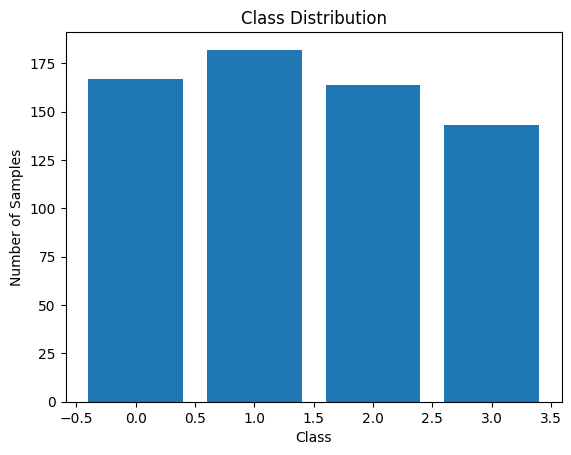

In [24]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_distribution)), class_distribution)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [25]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1.

X_train shape: (524, 117, 768)
X_test shape: (132, 117, 768)
y_train shape: (524,)
y_test shape: (132,)
Epoch 1/250
5/5 [==============================] - 10s 354ms/step - loss: 1.4091 - accuracy: 0.2634
Epoch 2/250
5/5 [==============================] - 2s 350ms/step - loss: 1.3791 - accuracy: 0.3244
Epoch 3/250
5/5 [==============================] - 2s 341ms/step - loss: 1.3876 - accuracy: 0.2920
Epoch 4/250
5/5 [==============================] - 2s 530ms/step - loss: 1.3598 - accuracy: 0.3378
Epoch 5/250
5/5 [==============================] - 3s 516ms/step - loss: 1.3704 - accuracy: 0.3263
Epoch 6/250
5/5 [==============================] - 2s 341ms/step - loss: 1.3692 - accuracy: 0.3206
Epoch 7/250
5/5 [==============================] - 2s 328ms/step - loss: 1.3541 - accuracy: 0.3359
Epoch 8/250
5/5 [==============================] - 2s 339ms/step - loss: 1.3524 - accuracy: 0.3416
Epoch 9/250
5/5 [==============================] - 2s 344ms/step - loss: 1.3485 - accuracy: 0.3454
Epoc

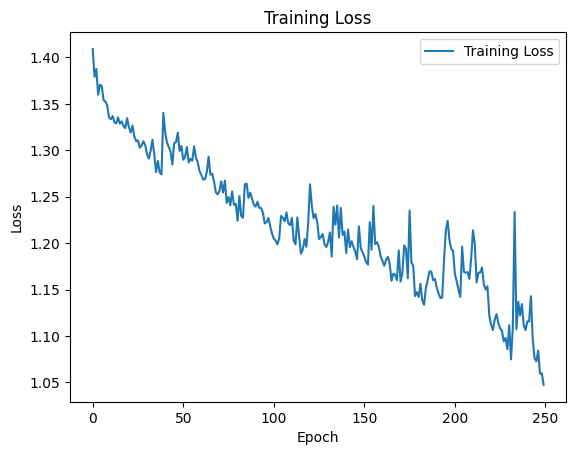

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have already loaded and preprocessed your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Define LSTM model with dropout
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout
model.add(Dense(units=4, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=64, epochs=250)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predict on test data
y_pred_probs = model.predict(X_test)

# Extract the class with the highest probability for each sample
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate classification report
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Define class names based on your problem
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()



In [ ]:
model = EmotionClassifier(feature_dim, hidden_dim, num_classes).to(device)

In [ ]:
import torch

def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):
    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""
    lr = initial_lr * (0.1**(epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train_model(num_epochs, initial_lr=0.001, lr_decay_epoch=3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    for epoch in range(num_epochs):
        running_loss = 0.0
        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Optional: Print average gradients per epoch to check for vanishing/exploding gradients
        avg_gradients = {name: torch.mean(param.grad.abs()).item() for name, param in model.named_parameters() if param.grad is not None}
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(loader)}, Avg Gradients: {avg_gradients}")

        # Check for NaN loss
        if torch.isnan(loss).any():
            print("NaN loss detected")
            break

def evaluate_model():
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.2f}")


In [ ]:
train_model(50)
evaluate_model()

Epoch 1, Loss: 0.7050982117652893, Avg Gradients: {'lstm.weight_ih_l0': 0.00015319950762204826, 'lstm.weight_hh_l0': 0.0001138313818955794, 'lstm.bias_ih_l0': 0.00045707906247116625, 'lstm.bias_hh_l0': 0.00045707906247116625, 'classifier.weight': 0.010660267435014248, 'classifier.bias': 0.004405215382575989}
Epoch 2, Loss: 0.6446354389190674, Avg Gradients: {'lstm.weight_ih_l0': 0.00011407291458453983, 'lstm.weight_hh_l0': 9.138100722339004e-05, 'lstm.bias_ih_l0': 0.0005290161934681237, 'lstm.bias_hh_l0': 0.0005290161934681237, 'classifier.weight': 0.010138976387679577, 'classifier.bias': 0.028205230832099915}
Epoch 3, Loss: 0.6003038883209229, Avg Gradients: {'lstm.weight_ih_l0': 8.434417395619676e-05, 'lstm.weight_hh_l0': 8.907501614885405e-05, 'lstm.bias_ih_l0': 0.0007479123887605965, 'lstm.bias_hh_l0': 0.0007479123887605965, 'classifier.weight': 0.010165289044380188, 'classifier.bias': 0.055923957377672195}
Epoch 4, Loss: 0.5680534839630127, Avg Gradients: {'lstm.weight_ih_l0': 5.7